In [2]:
# libraries
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

# COVID-19 Beliefs, Behaviors & Norms Survey


https://covidsurvey.mit.edu/api.html

We can access to aggregate data from the COVID-19 Beliefs, Behaviors & Norms Survey through an API. 

Example:

In [4]:
# endpoint URL
url = "http://covidsurvey.mit.edu:5000/query?"

# params of the request
params = {"country": "FR", 
          "signal": "effect_mask"}

# send the request
response = requests.get(url, params)

# parse results to json format
json_data = json.loads(response.text)

json_data

{'effect_mask': {'weighted': {'Extremely effective': 0.246,
   'Moderately effective': 0.265,
   'Not effective at all': 0.035,
   'Slightly effective': 0.074,
   'Very effective': 0.38}},
 'effective_sample_size': 44149.157,
 'input_params': {'age': 'all',
  'country': 'FR',
  'education': 'all',
  'gender': 'all'},
 'results_count': 64121}

As an exercise we will download and plot data for US on the evolution of vaccine acceptance:

In [5]:
# dictionary to store query results
data = {"Don't know": [],
       'I have already been vaccinated': [],
       'No': [],
       'Yes': []}

# iterate over waves
for wave in np.arange(1, 20):
    
    # define parameters of the query
    params = {"wave": "wave" + str(wave), 
              "country": "US",
              "signal": "vaccine_accept"}

    # do query and parse response
    response = requests.get(url, params)
    json_data = json.loads(response.text)

    # store results
    for k in data.keys():
        if k in json_data["vaccine_accept"]["weighted"].keys():
            data[k].append(json_data["vaccine_accept"]["weighted"][k])
        else:
            data[k].append(0)

Plot results:

Text(0.5, 1.0, 'Vaccine Acceptance - US')

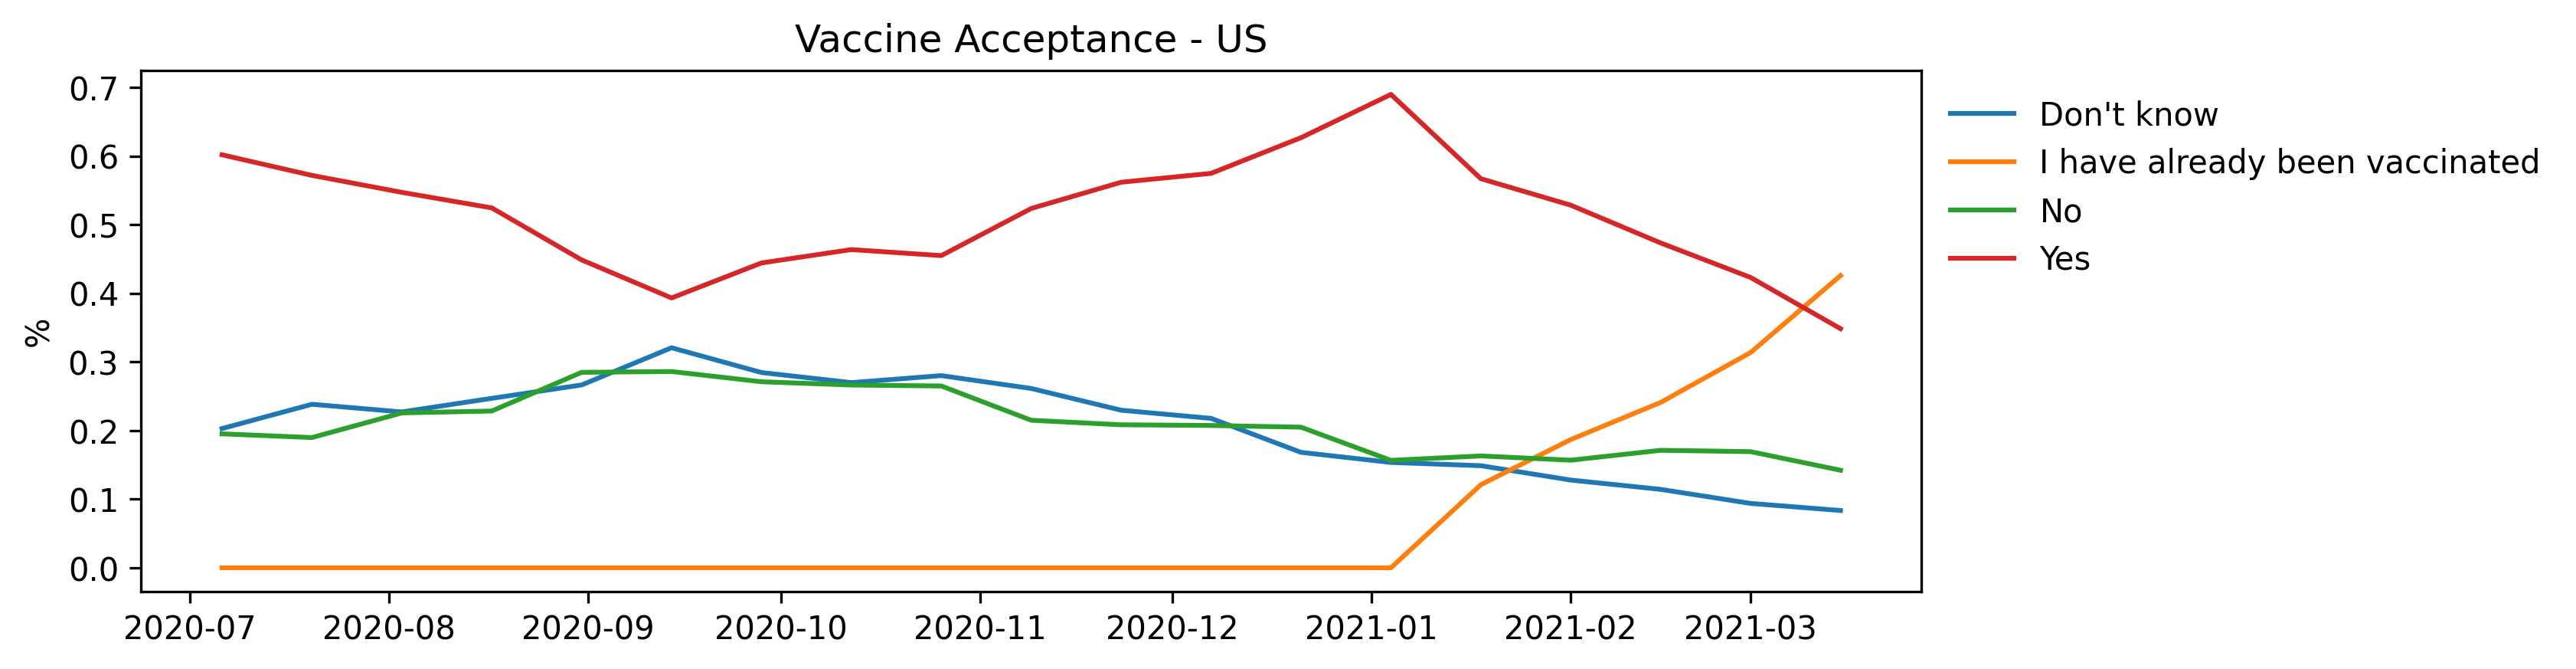

In [6]:
# plot results
dates = [datetime(2020, 7, 6) + timedelta(days=14*i) for i in range(19)]

fig, ax = plt.subplots(dpi=300, figsize=(10, 3))
for k in data.keys():
    ax.plot(dates, data[k], label=k)
ax.legend(frameon=False, bbox_to_anchor=[1,1,0,0])
ax.set_ylabel("%")
ax.set_title("Vaccine Acceptance - US")